### Import Libraries

In [ ]:
import pandas as pd
import numpy as np

### Import Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Materi Day 27/churn.csv')
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Basic Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


Terdapat 7046 baris secara keseluruhan dan masih banyak terdapat missing value, akan kita drop kemudian. Data type aman

In [ ]:
# cek duplikat
df.duplicated().sum()

14

In [ ]:
# drop data yang memiliki duplikat
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7023 non-null   object 
 1   Gender            7017 non-null   object 
 2   SeniorCitizen     7020 non-null   float64
 3   Partner           7016 non-null   object 
 4   Dependents        7013 non-null   object 
 5   Tenure            7015 non-null   float64
 6   Contract          7019 non-null   object 
 7   PaperlessBilling  7019 non-null   object 
 8   PaymentMethod     7021 non-null   object 
 9   MonthlyCharges    7022 non-null   float64
 10  TotalCharges      7032 non-null   float64
 11  Churn             7032 non-null   object 
dtypes: float64(4), object(8)
memory usage: 714.2+ KB


In [ ]:
# drop missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 1 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6898 non-null   object 
 1   Gender            6898 non-null   object 
 2   SeniorCitizen     6898 non-null   float64
 3   Partner           6898 non-null   object 
 4   Dependents        6898 non-null   object 
 5   Tenure            6898 non-null   float64
 6   Contract          6898 non-null   object 
 7   PaperlessBilling  6898 non-null   object 
 8   PaymentMethod     6898 non-null   object 
 9   MonthlyCharges    6898 non-null   float64
 10  TotalCharges      6898 non-null   float64
 11  Churn             6898 non-null   object 
dtypes: float64(4), object(8)
memory usage: 700.6+ KB


Kita membuang sekitar 134 baris kosong, yaitu sekitar 1.9% dan menurut saya masih tergolong aman dan bisa dilanjutkan ke step selanjutnya

### Handle Categorical Data

In [ ]:
cats = ['Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [ ]:
# kita encoding kolom Yes/No
def pemetaan(x):
  if x == 'No':
    return 0
  else:
    return 1

df['Partners'] = df['Partner'].apply(pemetaan)
df['Dependentss'] = df['Dependents'].apply(pemetaan)
df['Paperless Billing'] = df['PaperlessBilling'].apply(pemetaan)
df['Churns'] = df['Churn'].apply(pemetaan)
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partners,Dependentss,Paperless Billing,Churns
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No,0,0,0,0
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1
5,9305-CDSKC,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0.0,Yes,Yes,24.0,One year,Yes,Mailed check,84.80,1990.50,No,1,1,1,0
7028,2234-XADUH,Female,0.0,Yes,Yes,72.0,One year,Yes,Credit card (automatic),103.20,7362.90,No,1,1,1,0
7029,4801-JZAZL,Female,0.0,Yes,Yes,11.0,Month-to-month,Yes,Electronic check,29.60,346.45,No,1,1,1,0
7030,8361-LTMKD,Male,1.0,Yes,No,4.0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,0,1,1


In [ ]:
# encoding kolom Gender
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Gender'])
df['Genders'] = le.transform(df['Gender'])

df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partners,Dependentss,Paperless Billing,Churns,Genders
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No,0,0,0,0,1
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1,1
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,1
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1,0
5,9305-CDSKC,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0,0,1,1,0


Gender:
1 = laki-laki, 0 = perempuan

In [ ]:
df['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
#One Hot Encoding untuk kolom kategorikal lainnya
from sklearn.preprocessing import OneHotEncoder

dummies_contract = pd.get_dummies(df['Contract'], prefix = 'Contract')
dummies_contract.head(3)

,Contract_Month-to-month,Contract_One year,Contract_Two year
1,0,1,0
2,1,0,0
3,0,1,0


In [ ]:
df = pd.concat([df, dummies_contract], axis = 1)
df[['Contract', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']].head()

,Contract,Contract_Month-to-month,Contract_One year,Contract_Two year
1,One year,0,1,0
2,Month-to-month,1,0,0
3,One year,0,1,0
4,Month-to-month,1,0,0
5,Month-to-month,1,0,0


In [ ]:
df['PaymentMethod'].unique()

array(['Mailed check', 'Bank transfer (automatic)', 'Electronic check',
       'Credit card (automatic)'], dtype=object)

In [ ]:
dummies_payment_method = pd.get_dummies(df['PaymentMethod'], prefix = 'PaymentMethod')
dummies_payment_method.head(3)

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0


In [ ]:
df = pd.concat([df, dummies_payment_method], axis = 1)
df[['PaymentMethod', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].head(3)

,PaymentMethod,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,Mailed check,0,0,0,1
2,Mailed check,0,0,0,1
3,Bank transfer (automatic),1,0,0,0


In [ ]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Partners', 'Dependentss',
       'Paperless Billing', 'Churns', 'Genders', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
#drop kolom-kolom yang tidak diperlukan lagi

df.drop(['Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], axis = 'columns', inplace = True)
df.head()

,customerID,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Partners,Dependentss,Paperless Billing,Churns,Genders,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,5575-GNVDE,0.0,34.0,56.95,1889.50,0,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0.0,2.0,53.85,108.15,0,0,1,1,1,1,0,0,0,0,0,1
3,7795-CFOCW,0.0,45.0,42.30,1840.75,0,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0.0,2.0,70.70,151.65,0,0,1,1,0,1,0,0,0,0,1,0
5,9305-CDSKC,0.0,8.0,99.65,820.50,0,0,1,1,0,1,0,0,0,0,1,0


In [ ]:
df = df[['customerID', 'Genders', 'SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Partners', 'Dependentss', 'Paperless Billing', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churns']]
df.head(3)

,customerID,Genders,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Partners,Dependentss,Paperless Billing,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churns
1,5575-GNVDE,1,0.0,34.0,56.95,1889.50,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,1,0.0,2.0,53.85,108.15,0,0,1,1,0,0,0,0,0,1,1
3,7795-CFOCW,1,0.0,45.0,42.30,1840.75,0,0,0,0,1,0,1,0,0,0,0


### Split Data (Training & Testing)

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['customerID', 'Churns'])
y = df[['Churns']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

### Multicollinearity Checking

In [ ]:
# menghitung vif score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

feature = add_constant(x_train)
vif_df = pd.DataFrame([vif(feature.values, i)
            for i in range(feature.shape[1])],
            index = feature.columns).reset_index()
vif_df.columns = ['x', 'vif_score']
vif_df = vif_df.loc[vif_df.x!='const']
vif_df

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,x,vif_score
1,Genders,1.001328
2,SeniorCitizen,1.130013
3,Tenure,7.469978
4,MonthlyCharges,3.982235
5,TotalCharges,9.969282
6,Partners,1.482066
7,Dependentss,1.384731
8,Paperless Billing,1.191103
9,Contract_Month-to-month,inf
10,Contract_One year,inf


Terdapat 3 feature yang vif scorenya bernilai tinggi (> 4), yakni Tenure, MonthlyCharges, dan TotalCharges. Selanjutnya akan ditampilkan heatmap correlation untuk menentukan feature mana yang akan di drop

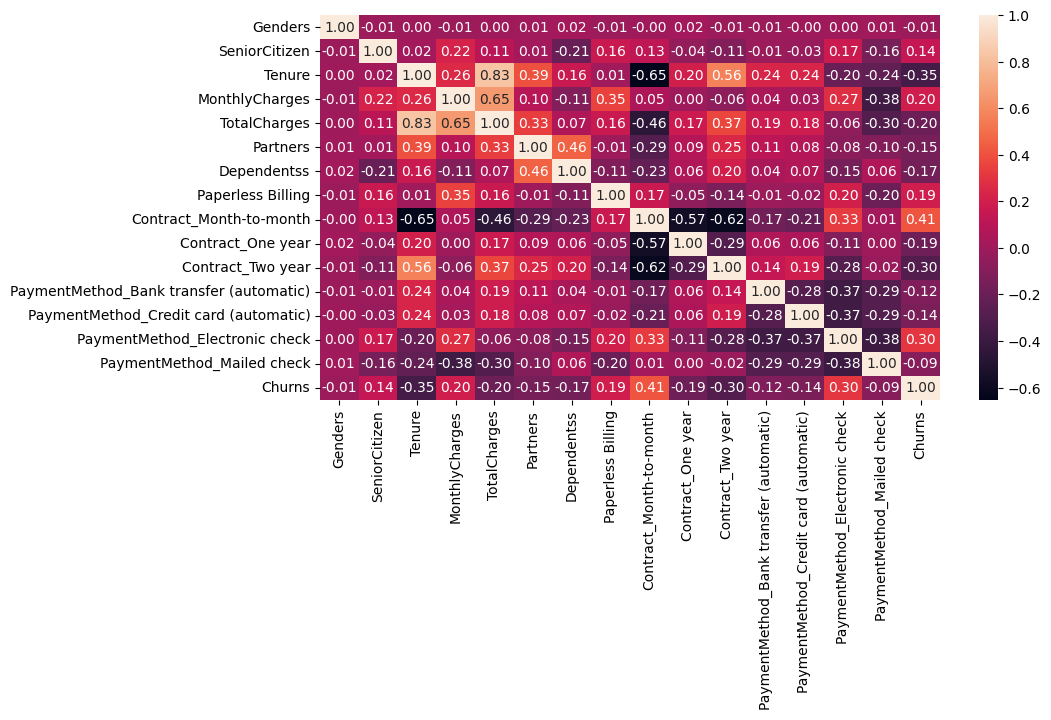

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.concat([x_train, y_train], axis = 1)
corr = train.corr()

plt.figure(figsize = (10, 5))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

Dapat dilihat bahwa Tenure dan TotalCharges berkorelasi sangat kuat (0.83). Dari kedua feature ini akan kita bandingkan korelasinya terhadap target, yaitu Churns. Korelasi Tenure-Churns = -0.35, sedangkan korelasi TotalCharges-Churns = -0.20. Korelasi Tenure-Churns > korelasi TotalCharges-Churns selanjutnya kolom TotalCharges akan didrop

In [ ]:
x_train = x_train.drop(columns = 'TotalCharges')
x_test = x_test.drop(columns = 'TotalCharges')

In [ ]:
# menghitung ulang vif score

feature = add_constant(x_train)
vif_df = pd.DataFrame([vif(feature.values, i)
            for i in range(feature.shape[1])],
            index = feature.columns).reset_index()
vif_df.columns = ['x', 'vif_score']
vif_df = vif_df.loc[vif_df.x!='const']
vif_df

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,x,vif_score
1,Genders,1.001074
2,SeniorCitizen,1.129026
3,Tenure,2.564009
4,MonthlyCharges,1.483617
5,Partners,1.481770
6,Dependentss,1.384118
7,Paperless Billing,1.190907
8,Contract_Month-to-month,inf
9,Contract_One year,inf
10,Contract_Two year,inf


Terlihat bahwa vif score sudah menunjukkan nilai yang aman sehingga kita bisa lanjutkan ke step selanjutnya

### Choose Best Metric

In [ ]:
df['Churns'].value_counts()

0    5073
1    1825
Name: Churns, dtype: int64

Feature target imbalanced, maka tidak boleh menggunakan metric accuracy.

Pada dataset ini kita akan memprediksi pelanggan yang Churn/Tidak Churn pada suatu provider. Karena saya ingin model yang dibuat sensitif terhadap pelanggan yang berpotensi Churn, maka saya akan gunakan metric Recall.
Metric Recall digunakan ketika kita ingin memperhatikan jumlah False Negatif yang lebih sedikit

### Train Model

In [ ]:
#split data to numpy

x = df.drop(columns = ['customerID', 'Churns']).to_numpy()
y = df[['Churns']].to_numpy()
y = y.reshape(len(y),)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

#### 1. Random Forest

In [ ]:
#import Random Forest sebagai model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators' : (10, 20, 30, 40, 50),
    'max_depth' : (1, 2, 3, 4, 5)
}

rf_gridcv = GridSearchCV(rf, parameters, cv = 5, scoring = 'recall')
rf_gridcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
#the result
cv_result = pd.DataFrame(rf_gridcv.cv_results_)
retain_cols = ['params', 'mean_test_score', 'rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.382578,1
23,"{'max_depth': 5, 'n_estimators': 40}",0.382578,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.379094,3
24,"{'max_depth': 5, 'n_estimators': 50}",0.377003,4
22,"{'max_depth': 5, 'n_estimators': 30}",0.374216,5
16,"{'max_depth': 4, 'n_estimators': 20}",0.341463,6
17,"{'max_depth': 4, 'n_estimators': 30}",0.332404,7
19,"{'max_depth': 4, 'n_estimators': 50}",0.331707,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.331010,9
15,"{'max_depth': 4, 'n_estimators': 10}",0.328223,10


Terlihat bahwa ada 2 kandidat terbaik yakni {'max_depth': 5, 'n_estimators': 10} dan {'max_depth': 5, 'n_estimators': 40}

### Evaluasi Model & Classification Report

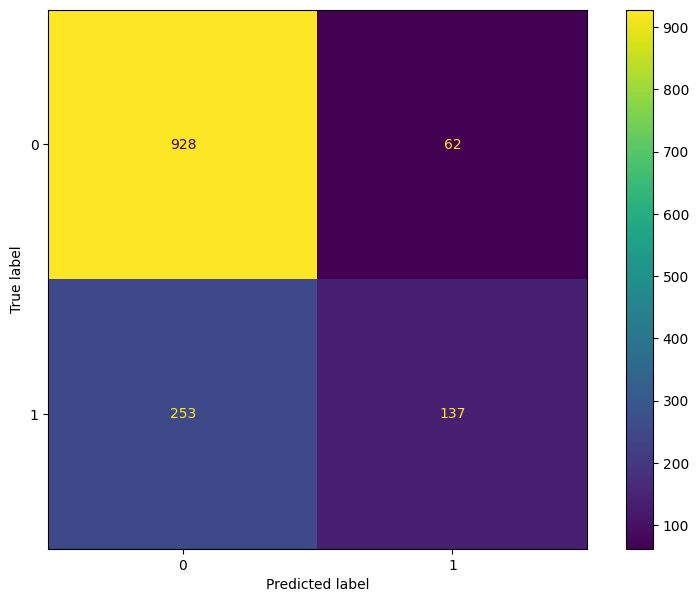

In [ ]:
#melihat Confusion Matrix menggunakan randomcv
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize = (10, 7))
y_pred = rf_gridcv.best_estimator_.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels = rf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_gridcv.best_estimator_.classes_)
disp.plot(ax = ax)
plt.show()

In [ ]:
#menghitung recall
from sklearn.metrics import recall_score

print('Recall =', recall_score(y_test, y_pred))

Recall = 0.35128205128205126


In [ ]:
#classification report
from sklearn.metrics import classification_report
y_pred = rf_gridcv.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.85       990
           1       0.69      0.35      0.47       390

    accuracy                           0.77      1380
   macro avg       0.74      0.64      0.66      1380
weighted avg       0.76      0.77      0.74      1380



Kita cukup melihat bagian 1 di kolom recall yang menunjukkan angka 0.35. Angka ini dapat diartikan dari 100 orang yang benar-benar churn, model hanya dapat memprediksi 35 orang. Bisa dikatakan performa model sangat kurang padahal sudah menggunakan model Machine Learning yang cukup kompleks. Berarti dengan kata lain model kita overfitting. Selanjutnya akan dicoba menghitung dengan model machine learning yang lebih sederhana

#### 2. KNN



In [ ]:
#import KNN sebagai model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
#hyperparameter tuning

parameters = {
    'n_neighbors' : (2, 3, 4, 5, 6, 7, 8),
    'weights' : ('uniform', 'distance')
}

knn_gridcv = GridSearchCV(knn, parameters, cv = 5, scoring = 'recall')
knn_gridcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [ ]:
#the result
cv_result_knn = pd.DataFrame(knn_gridcv.cv_results_)
retain_cols = ['params', 'mean_test_score', 'rank_test_score']
cv_result_knn[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.485017,1
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.472474,2
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.464808,3
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.464808,3
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.462718,5
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.459930,6
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.455749,7
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.455749,7
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.447387,9
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.442509,10


Dengan menggunakan model KNN didapatkan nilai terbaik {'n_neighbors': 2, 'weights': 'distance'}

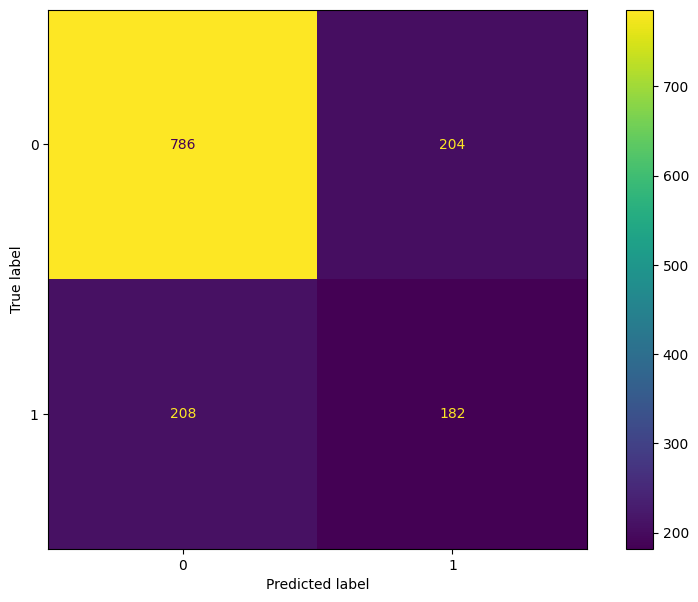

In [ ]:
#melihat Confusion Matrix menggunakan randomcv

fig, ax = plt.subplots(figsize = (10, 7))
y_pred = knn_gridcv.best_estimator_.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels = knn_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn_gridcv.best_estimator_.classes_)
disp.plot(ax = ax)
plt.show()

In [ ]:
#classification report
from sklearn.metrics import classification_report
y_pred = knn_gridcv.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       990
           1       0.47      0.47      0.47       390

    accuracy                           0.70      1380
   macro avg       0.63      0.63      0.63      1380
weighted avg       0.70      0.70      0.70      1380



Bisa dilihat bahwa dengan menggunakan model KNN, recallnya naik menjadi 47% yang artinya dari antara 100 orang yang churn, model bisa memprediksi 47 orang

#### 3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_prob = model.predict_proba(x_test)
y_pred_prob

array([[0.46178756, 0.53821244],
       [0.81748724, 0.18251276],
       [0.96096229, 0.03903771],
       ...,
       [0.98462208, 0.01537792],
       [0.63014588, 0.36985412],
       [0.96153247, 0.03846753]])

In [ ]:
print('Recall =', recall_score(y_test, y_pred))

Recall = 0.5051282051282051


Dari antara ketiga model yang saya tampilkan disini, performa paling bagus didapat dari model Logistic Regression dengan recall = 50%, yang artinya dari 100 orang yang benar-benar Churn, model Logistic Regression bisa memprediksi dengan benar 50 orang.

Hal ini menunjukkan bahwa dataset yang digunakan cukup sederhana sehingga memerlukan model yang sederhana juga, karena jika menggunakan model yang kompleks malah menurunkan performanya.